<a href="https://colab.research.google.com/github/rjgarcia92/CoderHouse_DataScience_I/blob/main/Detecci%C3%B3n_de_transacciones_fraudulentas_por_Richard_Garcia_Primer_entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science CoderHouse 60905

### Alumno: Richard Garcia

##Introducción
En el entorno actual donde los pagos digitales vienen creciendo desde los ultimos años surge la necesidad de evitar el fraude en la mayor medida posible.

El fraude con tarjetas representa una enorme fuente de pérdidas financieras para las empresas, por esto la capacidad de identificar con precisión las transacciones con alta probabilidad de fraude aporta en gran medida al stock de herramientas tecnologicas para mejorar el rendimiento de los indicadores de gestión de la empresa, evitando posibles pérdidas.

En este contexto, el presente trabajo se enfoca en explorar un conjunto de datos relacionado a transacciones y construir un modelo para predecir si una transacción tiene altas probabilidades de ser un intento de fraude o no.

## Descripción del Problema

Las perdidas por transacciones fraudulentas pueden escalar a niveles inimaginables, afectando la estabilidad y solidez.

Debemos identificar aquellos factores que nos permiten detectar los patrones que existan en las transacciones fraudulentas, la idea es desarrollar un modelo predictivo preciso que sirva de apoyo para evitar el fraude.

En este sentido, el análisis de datos y la construcción de modelos de clasificación pueden proporcionar insights valiosos para mejorar la evaluación de riesgos y la toma de decisiones.

## Objetivo

El objetivo principal de este trabajo es construir un modelo de clasificación que pueda predecir si una transaccion es considerada como fraude o no para prevenir perdidas.

Para lograr este objetivo, se explorará un conjunto de datos relacionado con transacciones realizadas durante el año 2019-2020, se realizará un análisis exploratorio de los datos para comprender mejor las características y los patrones presentes en ellos.

## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/kartik2112/fraud-detection/data?select=fraudTrain.csv

Este conjunto de datos proporciona información sobre las transacciones realizadas por un grupo de usuarios durante 2 años continuos.

El uso de estos datos permitirá realizar un análisis exhaustivo y construir un modelo predictivo robusto para combatir el fraude.

## Importación de Librerías y Carga de Datos


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/Coderhouse/fraudTrain.csv", sep=",")

## Exploración de los Datos (EDA)

En esta sección, exploramos el conjunto de datos para comprender sus características.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [ ]:
# Para observar la informacion del dataset y las primeras 3 filas del conjunto de datos

print(df_original.info())
df_original.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
# Para mirar los valores únicos en la variable de destino "is_fraud"
print ( "\nValores únicos en 'is_fraud':" )
print ( df_original['is_fraud'].value_counts())


Valores únicos en 'is_fraud':
0    1289169
1       7506
Name: is_fraud, dtype: int64


In [ ]:
# Para validar las estadisticas de las transacciones fraudulentas
df_original.amt.loc[df_original["is_fraud"] == 1].reset_index(drop=True).describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

**Se destacan los siguientes datos de las 7506 transacciones marcadas como fraude:**
* Promedio: 390
* Media: 531
* Valor min: 1.06 usd
* Valor max: 1376 usd

### Descripción del dataset

El conjunto de datos contiene mas de 1 millon de filas (registros) y 23 columnas.

A continuación se describen las columnas y/o variables actuales del dataset para definir las que alimentaran al modelo

1. index 'Unnamed: 0': Identificador unico para cada columna  
2. trans_date_trans_time: la marca de tiempo que indica cuándo ocurrió la transacción.
3. cc_num: Número de tarjeta de crédito utilizada para la transacción.
4. merchant: El nombre o identificador del comerciante donde se realizó la transacción.
5. category: La categoría de la transacción (por ejemplo, comestibles, electrónica, etc.).
6. amt: La cantidad de dinero involucrada en la transacción.
7. first: el nombre del titular de la tarjeta.
8. last: El apellido del titular de la tarjeta.
9. gender: Género del titular de la tarjeta.
10. street: La dirección postal del titular de la tarjeta.
11. city: La ciudad donde reside el titular de la tarjeta.
12. state: El estado donde reside el titular de la tarjeta.
13. zip: El código postal de la ubicación del titular de la tarjeta .
14. lat: Coordenada de latitud de la ubicación del titular de la tarjeta .
15. long: Coordenada de longitud de la ubicación del titular de la tarjeta .
16. city_pop: La población de la ciudad donde reside el titular de la tarjeta.
17. job: La ocupación o puesto de trabajo del titular de la tarjeta.
18. dob:  Fecha  de nacimiento del titular de la tarjeta.
19. trans_num: Número o identificador de la transacción.
20. unix_time: la marca de tiempo de la transacción en formato de hora UNIX.
21. merch_lat: Coordenada de latitud de la ubicación del comerciante .
22. merch_long: Coordenada de longitud de la ubicación del comerciante .
23. is_fraud: Indicador  binario ( 0  o  1 ) que denota si la transacción es fraudulenta ( 1 ) o  no ( 0 ).

---


**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir el fraude en una transacción son las siguientes:
1. "trans_date_trans_time"
2. "amt"
3. "category"
4. "gender"
5. "city"
6. "zip"
7. "lat"
8. "long"
9. "state"
10. "job"
11. "merch_lat"
12. "merch_long"
13. "is_fraud"

**Variables Irrelevantes:**

1. "index Unnamed: 0"
2. "merchant"
3. "cc_num"
4. "first"
5. "last"
6. "street"
7. "city_pop"
8. "dob"
9. "trans_num"
10. "unix_time"

### Limpieza del dataset

In [ ]:
# borramos las columnas que no son utiles y creamos un nuevo dataset sin esta info para conservar el original
df = df_original

# Damos formato de fecha-hora al campo de fecha de la transaccion
df['trans_date_trans_time'] = pd.to_datetime( df [ 'trans_date_trans_time' ])
df = df.sort_values(by= 'trans_date_trans_time' )
df = df.reset_index(drop=True)

# aca creo nuevos campos identificadores de fecha y extraigo datos de la info sobre fechas como si es fin de semana o si la transaccion fue realizada de dia o de noche
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_date'] = pd.to_datetime( df [ 'trans_date' ])
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_night'] = ((df['trans_hour'] >= 22) | (df['trans_hour'] < 6)).astype(int)

# Aca creamos identificadores unicos para los clientes para considerarlos en el modelo
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['merchant_id'] = label_encoder.fit_transform(df['merchant'])
df.rename(columns={'trans_num': 'Trans_ID'}, inplace=True)
df['Customer_ID'] = label_encoder.fit_transform(df['first'] + df['last'])

#eliminamos los campos viejos de identificación de clientes  #.drop(['Unnamed: 0','merchant','cc_num', 'first','last','street','city_pop','dob','trans_num','unix_time'], axis=1)
df.drop(['Unnamed: 0', 'first', 'last'], axis=1, inplace=True)

df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,merch_lat,merch_long,is_fraud,trans_date,trans_hour,day_of_week,is_weekend,is_night,merchant_id,Customer_ID
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,36.011293,-82.048315,0,2019-01-01,0,1,0,1,514,417
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,49.159047,-118.186462,0,2019-01-01,0,1,0,1,241,869
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,43.150704,-112.154481,0,2019-01-01,0,1,0,1,390,300


In [ ]:
#Para validar si el cambio impacto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

## Hipótesis planteadas

1. Existe una diferencia entre el nivel de fraude según el genero
2. El fraude varía linealmente con el horario de la transacción
3. El fraude varia según el valor de la transacción
4. El fraude aumenta según el origen de la transacción

In [ ]:
# Datasets para los graficos

df_fraud = df.loc[df["is_fraud"] == 1].reset_index(drop=True)
df_non_fraud = df.loc[df["is_fraud"] == 0].reset_index(drop=True)

In [ ]:
df_fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

### Hipotesis 1: Según el género

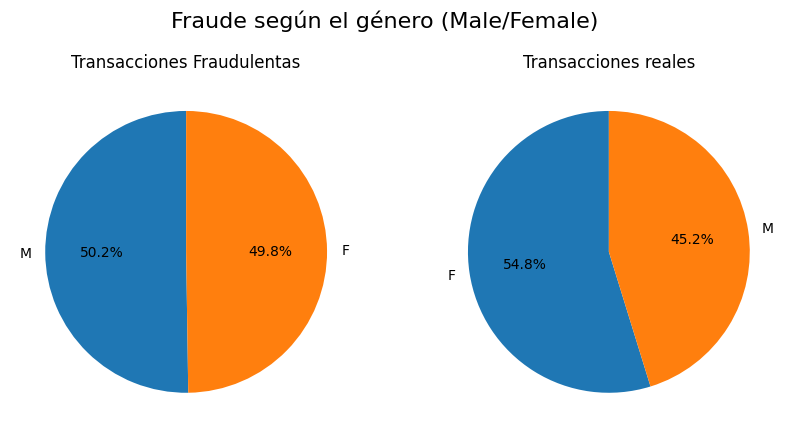

In [ ]:
# Calcular los porcentajes de fraude por género - Matplotlib 1
gender_fraud = df_fraud['gender'].value_counts(normalize=True)
gender_non_fraud = df_non_fraud['gender'].value_counts(normalize=True)

# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de torta con la proporcion de fraude por genero
axes[0].pie(gender_fraud, labels=gender_fraud.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Transacciones Fraudulentas')

# Gráfico de torta con la proporcion de transacciones reales por genero
axes[1].pie(gender_non_fraud, labels=gender_non_fraud.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Transacciones reales')

plt.suptitle('Fraude según el género (Male/Female)', fontsize=16)
plt.show()

No hay una clara diferencia entre la población que hace fraude o no según el género, en el grupo de los hombres es 52% y mujeres 48%, en cuanto a transacciones reales si hay una diferencia notable al respecto.

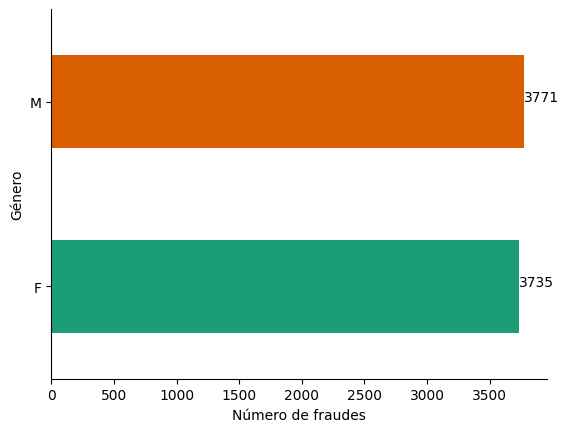

In [ ]:
# Grafico de barras para la proporcioón de pagos fraudulentos - Matplotlib 2
df_fraud.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Etiquetas para los ejes x - y
plt.xlabel('Número de fraudes')
plt.ylabel('Género')

# Agrupar y contar el número de fraudes por género
conteo_por_genero = df_fraud.groupby('gender').size()

# Añadir etiquetas al final de cada barra
for index, value in enumerate(conteo_por_genero):
    plt.text(value, index, str(value))

# Mostrar el gráfico
plt.show()


Con esto confirmamos que los hombres hacen mas fraude que las mujeres, aunque por muy poco

### Hipotesis 2: Según el horario



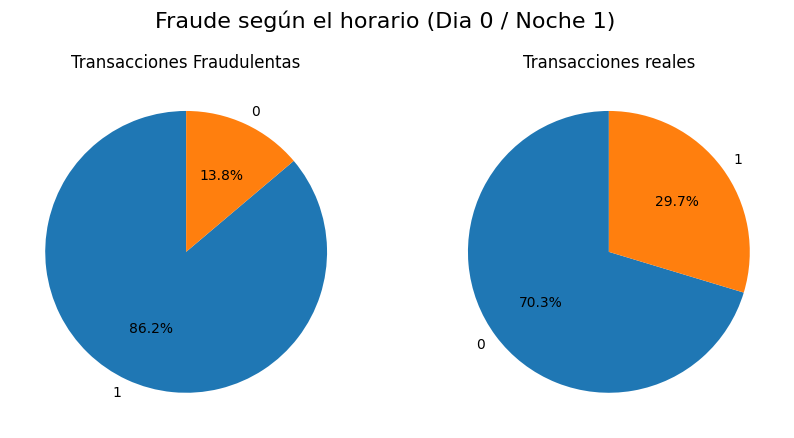

In [ ]:
# Calcular los porcentajes de fraude segun los horarios - Matplotlib 3
hour_fraud = df_fraud['is_night'].value_counts(normalize=True)
hour_non_fraud = df_non_fraud['is_night'].value_counts(normalize=True)

# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de torta con la proporcion de fraude por genero
axes[0].pie(hour_fraud, labels=hour_fraud.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Transacciones Fraudulentas')

# Gráfico de torta con la proporcion de transacciones reales por genero
axes[1].pie(hour_non_fraud, labels=hour_non_fraud.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Transacciones reales')

plt.suptitle('Fraude según el horario (Dia 0 / Noche 1)', fontsize=16)

plt.show()

Se puede observar que la mayoria de transacciones fraudulentas realmente ocurren en el horario del día, es muy baja la tasa de fraude por la noche

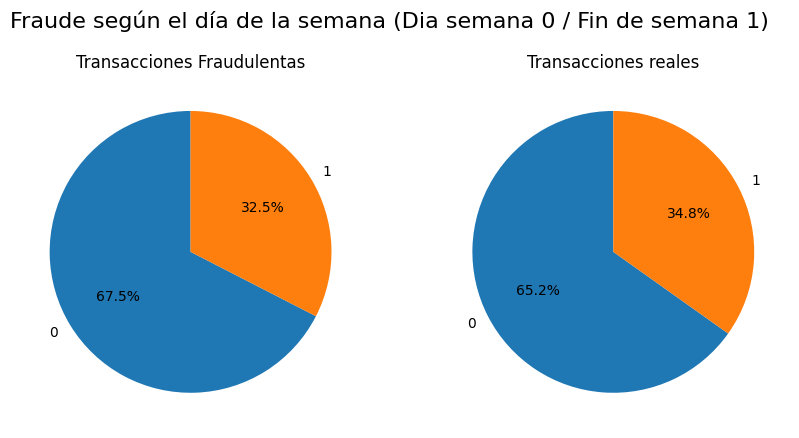

In [ ]:
# Calcular los porcentajes de fraude segun si es fin de semana - Matplotlib 4
wknd_fraud = df_fraud['is_weekend'].value_counts(normalize=True)
wknd_non_fraud = df_non_fraud['is_weekend'].value_counts(normalize=True)

# Crear un subplot con dos gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de torta con la proporcion de fraude por genero
axes[0].pie(wknd_fraud, labels=wknd_fraud.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Transacciones Fraudulentas')

# Gráfico de torta con la proporcion de transacciones reales por genero
axes[1].pie(wknd_non_fraud, labels=wknd_non_fraud.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Transacciones reales')

plt.suptitle('Fraude según el día de la semana (Dia semana 0 / Fin de semana 1)', fontsize=16)

plt.show()

Tambien se descarta una mayor posibilidad de fraude en fines de semana, la mayoria de transacciones con fraude son realizadas en dias de la semana y dentro del horario laboral común, por lo cual las estrategias para detección del fraude deben ser aun más robustas para estudiar el comportamiento durante el transcurso del día donde pueden ejecutarse grandes volumenes de transacciones.

### Hipotesis 3: Según el valor


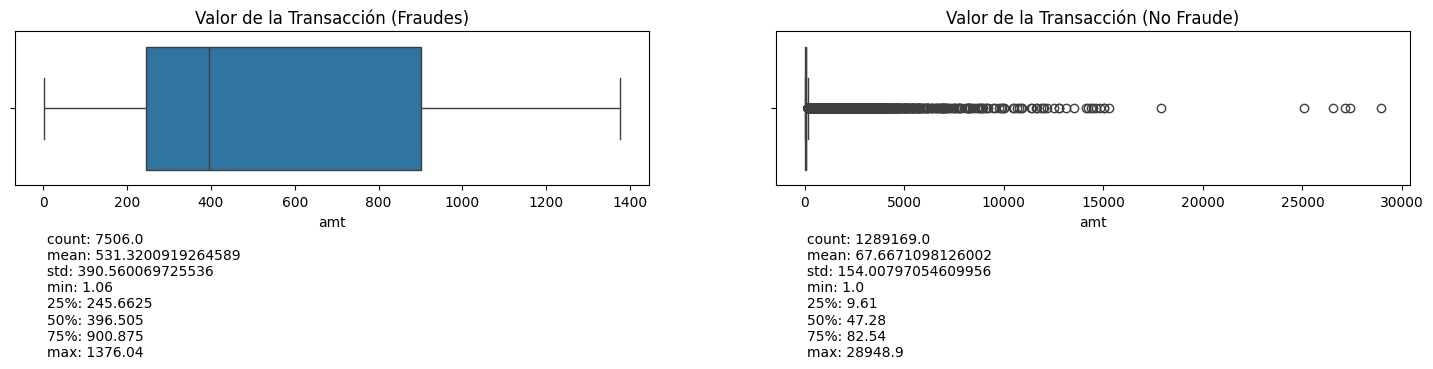

In [ ]:
# Especificar el tamaño deseado para los gráficos - Seaborn 1
tamanio_figura = (18, 2)  # Ancho, Alto

# Crear un subplot con dos boxplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=tamanio_figura)

# Boxplot para Fraudes
sns.boxplot(x=df_fraud['amt'], ax=axes[0])
axes[0].set_title('Valor de la Transacción (Fraudes)')

# Agregar los valores estadísticos debajo del boxplot de Fraudes
desc_fraud = df_fraud['amt'].describe()
text_fraud = '\n'.join([f'{stat}: {desc_fraud[stat]}' for stat in desc_fraud.index])
axes[0].text(0.05, -0.3, text_fraud, transform=axes[0].transAxes, fontsize=10, verticalalignment='top')

# Boxplot para No Fraude
sns.boxplot(x=df_non_fraud['amt'], ax=axes[1])
axes[1].set_title('Valor de la Transacción (No Fraude)')

# Agregar los valores estadísticos debajo del boxplot de No Fraude
desc_non_fraud = df_non_fraud['amt'].describe()
text_non_fraud = '\n'.join([f'{stat}: {desc_non_fraud[stat]}' for stat in desc_non_fraud.index])
axes[1].text(0.05, -0.3, text_non_fraud, transform=axes[1].transAxes, fontsize=10, verticalalignment='top')

#mostrar el grafico
plt.show()

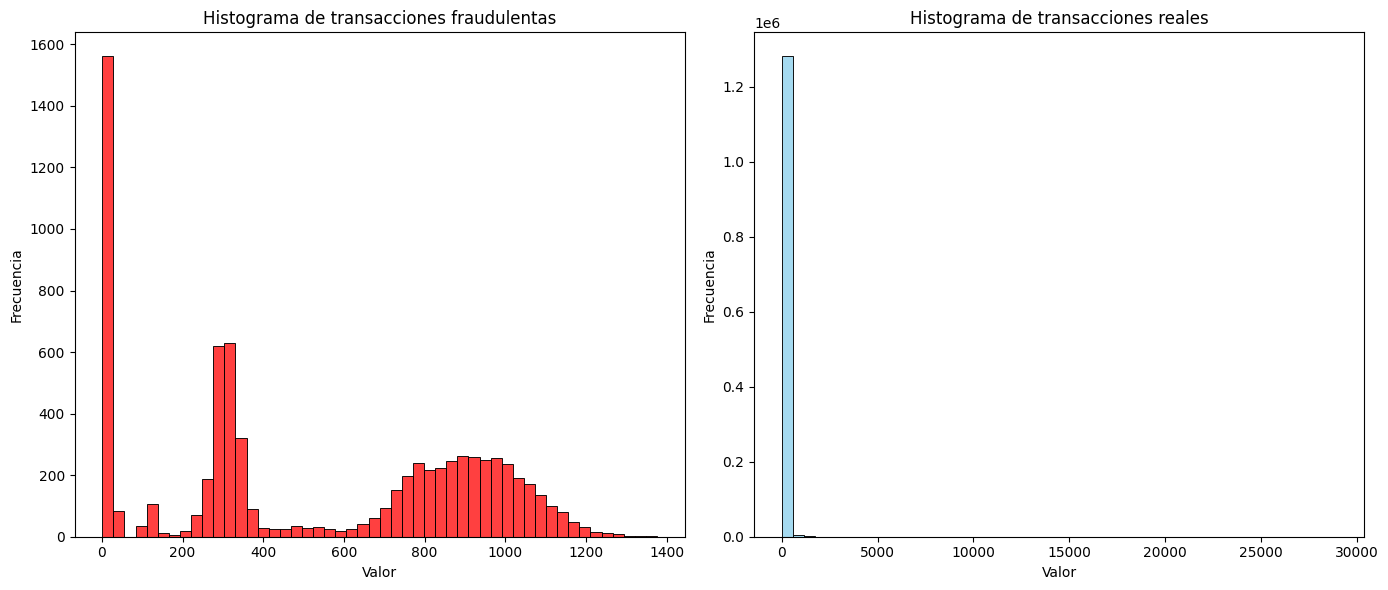

In [ ]:
# Validando los datos de las transacciones con histogramas - Seaborn 2

# Definir el tamaño personalizable de la figura
tamanio_figura = (14, 6)

# Crear el histograma con Seaborn para datos de fraude
plt.figure(figsize=tamanio_figura)

# Histograma para transacciones fraudulentas
plt.subplot(1, 2, 1)  # Subplot 1 de 1 fila y 2 columnas
sns.histplot(df_fraud['amt'], bins=50, color='red', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de transacciones fraudulentas')

# Crear el histograma con Seaborn para datos de no fraude
plt.subplot(1, 2, 2)  # Subplot 2 de 1 fila y 2 columnas
sns.histplot(df_non_fraud['amt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de transacciones reales')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()


Se observa que en cuanto a valores, las transacciones fraudulentas se ven en mayor proporcion por debajo de los 400 dolares.

Otro grupo predominante dentro del conjunto de datos serian aquellos que realizan transacciones entre los 700-1100 usd ya que pueden representar una perdida potencial enorme por la relación cantidad-valor.

### Hipotesis 4: Según el origen



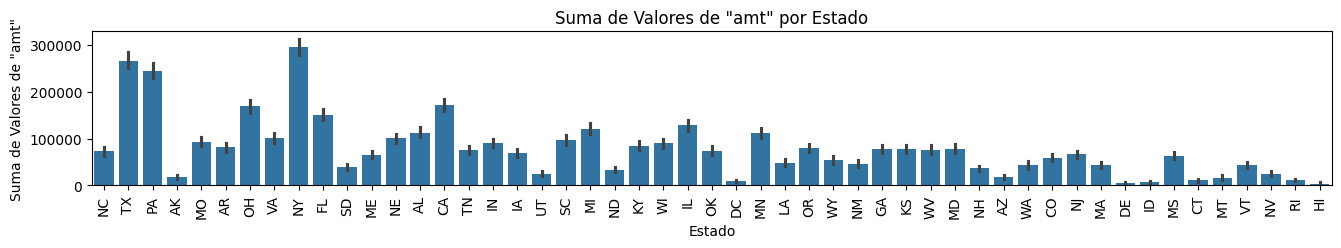

In [ ]:
# Seaborn 3

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(16, 2))

df_fraud_origin = sns.barplot(data=df_fraud, x='state', y='amt', estimator=sum)
plt.title('Suma de Valores de "amt" por Estado')
plt.xlabel('Estado')
plt.ylabel('Suma de Valores de "amt"')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show(df_fraud_origin)

Se destaca NY como la ciudad con mayor fraude dentro de nuestros datos, seguido de las ciudades TX y PA.

Procedemos a indagar un poco mas.

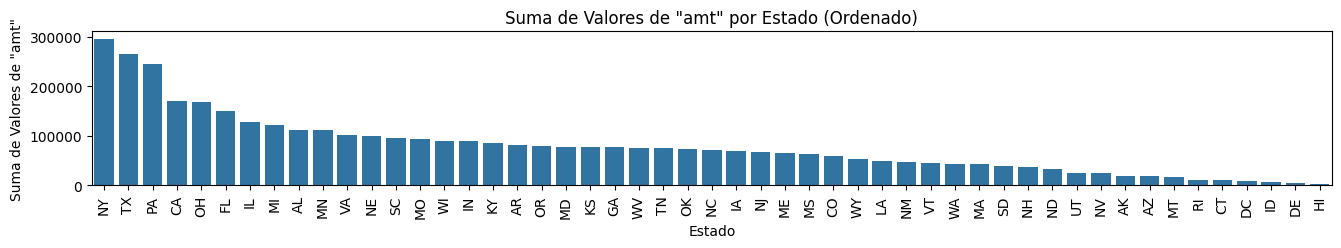

In [ ]:
# Tomamos la información anterior pero organizada de mayor a menor según el estado
df_sum_amt = df_fraud.groupby('state')['amt'].sum().reset_index()

# Ordenar el DataFrame por la suma de "amt" de forma descendente
df_sum_amt_sorted = df_sum_amt.sort_values(by='amt', ascending=False)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(16, 2))
sns.barplot(data=df_sum_amt_sorted, x='state', y='amt')
plt.title('Suma de Valores de "amt" por Estado (Ordenado)')
plt.xlabel('Estado')
plt.ylabel('Suma de Valores de "amt"')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()


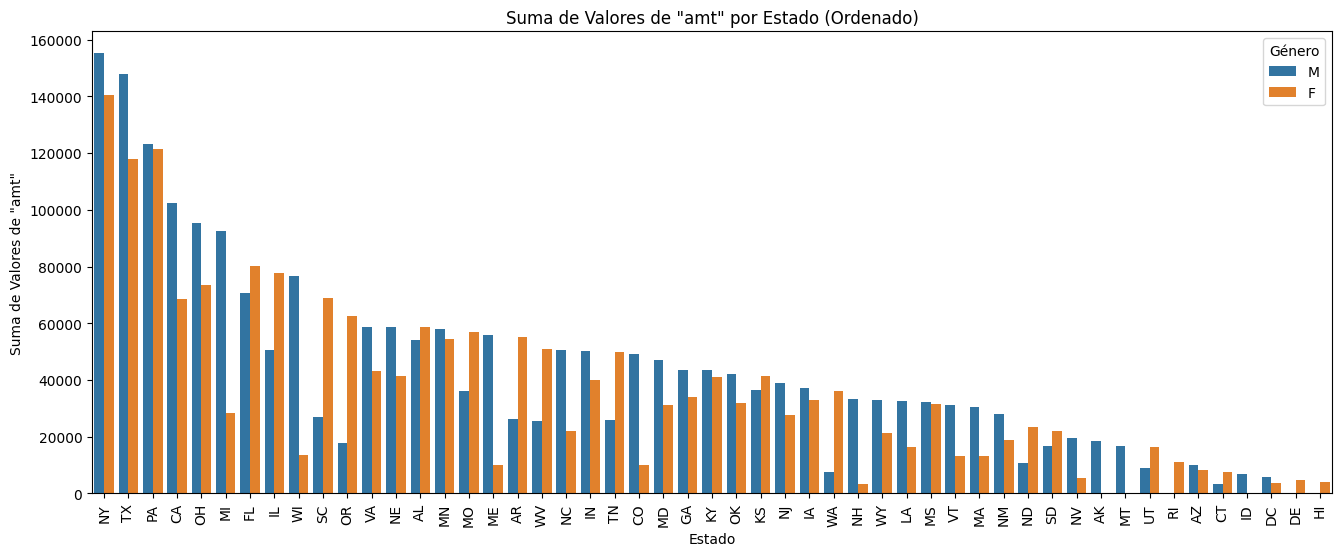

In [ ]:
# Ahora la misma información la generamos separada según el genero
df_sum_amt = df_fraud.groupby(['state', 'gender'])['amt'].sum().reset_index()

# Ordenar el DataFrame por la suma de "amt" de forma descendente
df_sum_amt_sorted = df_sum_amt.sort_values(by='amt', ascending=False)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(16, 6))
sns.barplot(data=df_sum_amt_sorted, x='state', y='amt', hue='gender')
plt.title('Suma de Valores de "amt" por Estado (Ordenado)')
plt.xlabel('Estado')
plt.ylabel('Suma de Valores de "amt"')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.legend(title='Género')
plt.show()


Podemos observar que la mayor cantidad de revenue proveniente del fraude pertecene al genero masculino en el top 6 estados con mayor fraude total

In [ ]:
## Ubicación de los usuarios que hacen fraude
df_fraud

import plotly.express as px

fig3 = px.scatter_mapbox(df_fraud, lat="lat", lon="long", hover_name="city", hover_data=["state", "city_pop"],
                        color_discrete_sequence=["red"], zoom=3, height=300)
fig3.update_layout(mapbox_style="open-street-map")
fig3.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig3.show()

La tasa de default se incrementa casi linealmente con los ingresos, lo cual parece ser contraintuitivo

In [ ]:
## Ubicación de los negocios donde se realiza el fraude
df_fraud

import plotly.express as px

fig3 = px.scatter_mapbox(df_fraud, lat="merch_lat", lon="merch_long", hover_name="city", hover_data=["state", "city_pop"],
                        color_discrete_sequence=["red"], zoom=3, height=300)
fig3.update_layout(mapbox_style="open-street-map")
fig3.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig3.show()

Según se observa, hay un alto indice de fraude para algunos sectores de estados unidos